# Edition d'attributs avec des GAN

#### Groupe : Hanna Bekkare, Ines Besbes, Tristan Gay, Clément Gris & Sara Rool
#### 4 ModIA

## 1 - Introduction

L'édition des attributs faciaux est essentielle pour la retouche photo et la post-production cinématographique, nécessitant des modifications contrôlées sans affecter d'autres attributs ni l'identité de la personne. Les méthodes basées sur l'apprentissage profond présentent des limites en termes de résolution et de contrôle. Pour surmonter ces défis, une nouvelle approche propose des transformations qui ont lieu dans l'espace latent de StyleGAN, permettant une édition des attributs faciaux précise et préservant l'identité, applicable aux images et vidéos. Cette méthode innovante permet des modifications contrôlées, tout en assurant une stabilité dans les images. 

Les travaux précédents dans ce domaine se sont principalement concentrés sur des images de faible résolution. Les approches plus récentes utilisent des réseaux génératifs pour réaliser des transformations dans l'espace latent des caractéristiques. Cependant, ces méthodes supposent souvent que l'espace latent est linéaire, ce qui réduit leur efficacité. De plus, leurs performances sur des images réelles sont souvent décevantes. En s'inspirant de ces travaux, une nouvelle méthode a été développée pour surmonter ces limitations, l'édition d'attributs à l'aide d'un StyleGan.

![Capture d’écran du 2024-05-25 10-55-06.png](pictures/Capture3.png)
<div style="text-align:center;">
 Source : Yao, X., Newson, A., Gousseau, Y., & Hellier, P. (Year). "A Latent Transformer for Disentangled Face Editing in Images and Videos."
</div>

## 2 - Auto-encodeur, GAN et StyleGAN

Avant de décrire la méthode, il nous faut définir différent concepts qui vont constitués le processus global d'édition d'attributs.

#### Les Auto-encodeurs
Les auto-encodeurs sont des réseaux de neurones ayant le même nombre de neurones dans les couches d’entrée et de sortie. Leur objectif est de produire une sortie aussi proche que possible de l’entrée, rendant l’apprentissage « auto-supervisé ». Ainsi, la perte à minimiser est le coût de reconstruction entre l’entrée et la sortie, ce qui permet de traiter des données non étiquetées.  

Les auto-encodeurs possèdent une architecture « bottleneck » avec des couches cachées plus petites que les couches d’entrée et de sortie. On les divise en deux parties :
- **L’encodeur** : Compresse l’entrée en une représentation de dimension inférieure appelée espace latent.
- **Le décodeur** : Reconstruit l’entrée à partir de cette représentation latente.

Pendant l’apprentissage, l’encodeur apprend à conserver les informations essentielles pour que le décodeur puisse reconstruire fidèlement l’entrée.

Ainsi, les auto-encodeurs n’ont pas besoin de données étiquetées. De plus, leur capacité générative peut servir à augmenter des ensembles de données pour l’entraînement d’autres modèles. Le champ d’application des auto-encodeurs est très vaste, allant du débruitage à la génération de nouvelles données.

![autoencodeur.png](pictures/Capture4.png)

Source : DataScientest.com

#### Structure et Entraînement des GANs

StyleGAN est un type spécifique de réseau génératif adversarial (GAN) composé de deux sous-modèles principaux : le générateur et le discriminateur. Durant l'entraînement :

- Le générateur produit des images à partir d'un bruit aléatoire.
- Le discriminateur classe des images comme réelles ou générées.

Pendant le processus d'entraînement :

- Le discriminateur apprend à différencier les images réelles des images générées.
- Le générateur apprend à tromper le discriminateur en produisant des images de plus en plus réalistes.

![Capture d’écran du 2024-05-19 17-36-40.png](pictures/Capture2.png)

Source : DataScientest.com

#### Fonction de Perte

La fonction de perte du discriminateur est basée sur les erreurs de classification (réelle vs. générée), tandis que celle du générateur est basée sur sa capacité à tromper le discriminateur en produisant des images indiscernables des images réelles.

#### StyleGAN

StyleGAN se distingue par son architecture de générateur innovante. Au lieu de se baser uniquement sur des couches de convolution et de normalisation, il utilise une architecture basée sur le style, inspirée des techniques de transfert de style. Cette architecture inclut :

- Un réseau de mapping qui transforme le bruit d'entrée en un vecteur latent $w$ dans un espace latent.
- Un générateur composé de couches de convolutions et de couches Adaptive Instance Normalization (AdaIN), modulées par le vecteur latent $w$.

#### Détails Techniques

Dans StyleGAN, on utilise :

- Convolutions classiques avec un noyau de 3×3.
- Adaptive Instance Normalization (AdaIN) pour moduler les couches du générateur.
- Ajout de bruit gaussien à chaque étape de la génération pour ajouter des détails fins aux images.

![Capture d’écran du 2024-05-19 17-43-53.png](pictures/Capture1.png)
![Capture d’écran du 2024-05-19 17-44-14.png](pictures/Capture5.png)

En résumé, StyleGAN est une avancée majeure dans le domaine des GANs, offrant plus de flexibilité et une meilleure qualité. Son approche basée sur le style et ses techniques de modulation des couches du générateur lui permettent de générer des images haute résolution avec un contrôle détaillé des attributs.

## 3 - Méthode d'édition d'attributs

Dans le cadre de la transformation de visages dans les images et les vidéos, le processus comprend plusieurs étapes essentielles :

1. **Input Frames (Images d'entrée) :**
   Les images de chaque cadre de la vidéo sont collectées pour être traitées individuellement. Le traitement d'une vidéo revient donc à traiter chaque image la composant.

2. **Crop & Align (Recadrer et Aligner) :**
   Chaque image de la vidéo est recadrée et alignée pour isoler le visage. Cette étape assure que le visage soit centré et aligné de manière cohérente pour les étapes suivantes.

3. **Encodage :**
   Les images recadrées et alignées sont encodées dans l'espace latent $Z$. Cette projection représente une version initiale.

4. **StyleGAN :**
   Le vecteur latent $z$ est projeté dans l'espace latent $W$ via un processus de mapping. Des modifications d'attributs sont ensuite appliquées sur $W$, permettant de contrôler des aspects spécifiques de l'image comme l'âge, le sexe ou les expressions faciales. Enfin, une nouvelle image est reconstruite à partir de ce vecteur modifié.
   - **Récapitulatif :** $z \rightarrow$ Mapping vers $W$ (espace latent) $\rightarrow$ Modif d'attributs sur $w \in W$ $\rightarrow$ Reconstruction de $z'$

5. **Décodage :**
   Le code latent modifié $z'$ est décodé pour générer une nouvelle image avec les attributs modifiés. Cette étape transforme le code latent modifié en une image de pixels réaliste.

6. **Seamless Cloning (Clonage Transparent) :**
   La nouvelle image générée est fusionnée de manière transparente avec les cadres originaux de la vidéo. Cela assure que les modifications apportées au visage s'intègrent naturellement dans le contexte de la vidéo sans artefacts visibles.

![Capture d’écran du 2024-05-19 15-16-11.png](pictures/schéma.png)
<div style="text-align:center;">
 Source : Yao, X., Newson, A., Gousseau, Y., & Hellier, P. (Year). "A Latent Transformer for Disentangled Face Editing in Images and Videos."
</div>

## 4 - Première modification d'une image

Dans la section suivante, nous allons utiliser le code de StyleGAN pour effectuer des modifications directes sur l'image dans l'espace latent. Ces premiers tests visent à explorer comment les images sont modifiées lorsque nous intervenons directement sur les représentations latentes. En manipulant ces couches latentes, nous pouvons observer les transformations appliquées à l'image finale, offrant ainsi un premier aperçu des capacités et des dynamiques internes du modèle StyleGAN. Ces essais initiaux de modification nous permettent de mieux comprendre et d'évaluer les potentialités de cette approche innovante. Les codes suivants provienne du StyleGan original, les modifications que nous apportont apparaissent dans la dernière cellule de cette partie.

In [1]:
import os
import re
from typing import List, Optional, Tuple, Union
from tqdm import tqdm

import click
import dnnlib
import numpy as np
import PIL.Image
import torch
import matplotlib.pyplot as plt

import legacy

In [2]:
def make_transform(translate: Tuple[float,float], angle: float):
    m = np.eye(3)
    s = np.sin(angle/360.0*np.pi*2)
    c = np.cos(angle/360.0*np.pi*2)
    m[0][0] = c
    m[0][1] = s
    m[0][2] = translate[0]
    m[1][0] = -s
    m[1][1] = c
    m[1][2] = translate[1]
    return m

In [3]:
#./pixel2style2pixel/pretrained_models/psp_ffhq_encode.pt

network_pkl= "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan2/versions/1/files/stylegan2-ffhq-1024x1024.pkl"
seeds=[1]
truncation_psi= 1.0
noise_mode='const'
outdir= "out_mod"
translate=[0,0]
rotate= 0
class_idx= None

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan2/versions/1/files/stylegan2-ffhq-1024x1024.pkl"...
Generating image for seed 1 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... 

/home/gris/miniforge3/lib/python3.10/site-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/home/gris/miniforge3/lib/python3.10/site-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.


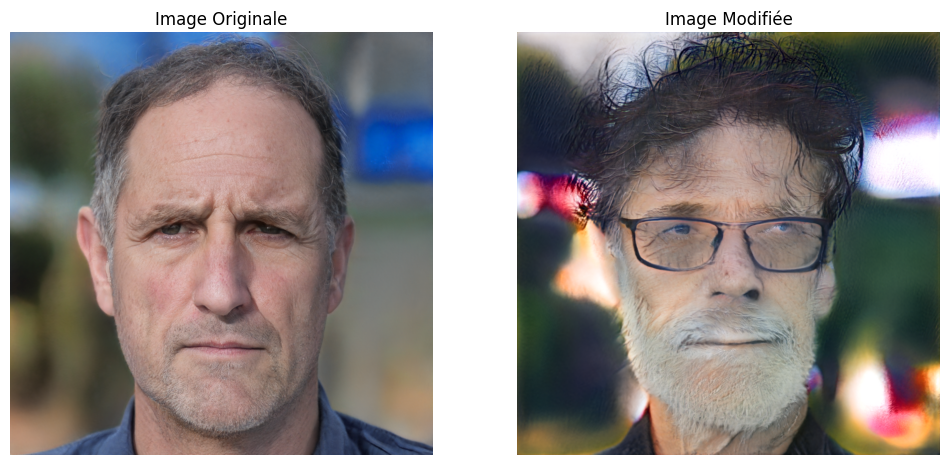

In [4]:
print('Loading networks from "%s"...' % network_pkl)
device = torch.device('cuda')
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

os.makedirs(outdir, exist_ok=True)

    # Labels.
label = torch.zeros([1, G.c_dim], device=device)
if G.c_dim != 0:
    if class_idx is None:
        raise click.ClickException('Must specify class label with --class when using a conditional network')
    label[:, class_idx] = 1
else:
    if class_idx is not None:
        print ('warn: --class=lbl ignored when running on an unconditional network')

    # Generate images.
for seed_idx, seed in enumerate(seeds):
    print('Generating image for seed %d (%d/%d) ...' % (seed, seed_idx, len(seeds)))
    z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.z_dim)).to(device)

        # Construct an inverse rotation/translation matrix and pass to the generator.  The
        # generator expects this matrix as an inverse to avoid potentially failing numerical
        # operations in the network.
    if hasattr(G.synthesis, 'input'):
        m = make_transform(translate, rotate)
        m = np.linalg.inv(m)
        G.synthesis.input.transform.copy_(torch.from_numpy(m))

################################################### On modifie l'image ici et on affiche l'image modifiée     ####################################
    img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)

    w = G.mapping(z,label) #On se place dans l'espace W
    w=w+torch.randn(1,18,512).to(device) #On modifie aléatoirement w
    img_mod = G.synthesis(w, noise_mode=noise_mode)


    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    img_pil = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

    img_mod = (img_mod.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    img_mod_pil = PIL.Image.fromarray(img_mod[0].cpu().numpy(), 'RGB')

    # Affichage des deux images côte à côte
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Afficher la première image
    axes[0].imshow(img_pil)
    axes[0].axis('off')  # Pour cacher les axes
    axes[0].set_title('Image Originale')

    # Afficher la deuxième image
    axes[1].imshow(img_mod_pil)
    axes[1].axis('off')  # Pour cacher les axes
    axes[1].set_title('Image Modifiée')

    plt.show()

## 5 - Construction d'un classifier

### 5.1 - Classifier pour un attribut

Le classifier d'un StyleGAN dans l'espace latent est un outil qui analyse le code latent des images. Le code latent est une représentation mathématique simplifiée de l'image, capturant ses caractéristiques principales. Le classifier prend ce code en entrée et produit un vecteur qui contient les probabilités de présence de 40 caractéristiques différentes dans l'image. Par exemple, il peut estimer la probabilité que l'image contienne un visage souriant, des lunettes, ou un certain type de coiffure. En résumé, le classifier aide à décomposer et comprendre les éléments présents dans une image générée par StyleGAN en analysant son code latent.

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.utils.data as data

class CodeLatentSimplAnnot(data.Dataset):
    def __init__(self, lat_file, annot_file):
        self.dlatents = np.load(lat_file)
        labels = np.load(annot_file)
        self.labels = labels[:, 21]  # On regarde ici le dernier attribut seulement
        self.length = len(self.labels)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        dlatent = torch.tensor(self.dlatents[idx], dtype=torch.float32)
        lbl = torch.tensor(self.labels[idx], dtype=torch.long)

        return dlatent, lbl

Cette classe, `CodeLatentSimplAnnot`, permet de créer un dataset personnalisé pour nos besoins de manipulation et d'analyse de données. En fournissant le chemin vers les fichiers contenant les codes latents et les annotations (les attributs), cette classe charge les données correspondantes et les prépare pour une utilisation ultérieure. Les codes latents sont extraits d'un fichier spécifié, tandis que les annotations sont chargées depuis un autre fichier, en se concentrant sur une colonne spécifique des annotations (dans un premier temps). Une fois les chemins fournis, cette classe crée un dataset structuré, facilitant ainsi l'accès aux données pour les phases d'entraînement et d'évaluation de modèles.

In [6]:
import numpy as np
import torch.utils.data as data

# Chargement les données
data_image = CodeLatentSimplAnnot('data/train/celebahq_dlatents_psp.npy', 'data/train/celebahq_anno.npy')

# Choix de la taille des ensembles d'entraînement et de test
train_size = int(0.7 * len(data_image))
test_size = len(data_image) - train_size

# Généreration une liste d'indices et la mélanger
indices = list(range(len(data_image)))
np.random.shuffle(indices)

# Séparation des indices en ensembles d'entraînement et de test
train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Création des sous-ensembles d'entraînement et de test
train_dataset = data.Subset(data_image, train_indices)
test_dataset = data.Subset(data_image, test_indices)

# Création des DataLoaders pour les ensembles d'entraînement et de test
trainloader = data.DataLoader(train_dataset, batch_size=124, shuffle=True)
testloader = data.DataLoader(test_dataset, batch_size=124, shuffle=False)



In [7]:
import numpy as np

# Charger les fichiers .npy
dlatents = np.load('data/train/celebahq_dlatents_psp.npy')
labels = np.load('data/train/celebahq_anno.npy')

# Vérifier les dimensions des matrices
print("Dimension des dlatents:", dlatents.shape)
print("Dimension des labels:", labels.shape)

# Pour chaque attribut, compter le nombre de 0 et de 1
num_attributes = labels.shape[1]
attribute_counts = []

for i in range(num_attributes):
    unique, counts = np.unique(labels[:, i], return_counts=True)
    attribute_counts.append(dict(zip(unique, counts)))

# Afficher le nombre de chaque attribut
for i, counts in enumerate(attribute_counts):
    print(f"Attribut {i}: {counts}")

Dimension des dlatents: (30000, 18, 512)
Dimension des labels: (30000, 40)
Attribut 0: {0: 25509, 1: 4491}
Attribut 1: {0: 18980, 1: 11020}
Attribut 2: {0: 12782, 1: 17218}
Attribut 3: {0: 21366, 1: 8634}
Attribut 4: {0: 29288, 1: 712}
Attribut 5: {0: 24575, 1: 5425}
Attribut 6: {0: 19110, 1: 10890}
Attribut 7: {0: 20266, 1: 9734}
Attribut 8: {0: 23408, 1: 6592}
Attribut 9: {0: 24874, 1: 5126}
Attribut 10: {0: 29887, 1: 113}
Attribut 11: {0: 23075, 1: 6925}
Attribut 12: {0: 24324, 1: 5676}
Attribut 13: {0: 27898, 1: 2102}
Attribut 14: {0: 28214, 1: 1786}
Attribut 15: {0: 28532, 1: 1468}
Attribut 16: {0: 27710, 1: 2290}
Attribut 17: {0: 28758, 1: 1242}
Attribut 18: {0: 16292, 1: 13708}
Attribut 19: {0: 16153, 1: 13847}
Attribut 20: {0: 18943, 1: 11057}
Attribut 21: {0: 15861, 1: 14139}
Attribut 22: {0: 28265, 1: 1735}
Attribut 23: {0: 26484, 1: 3516}
Attribut 24: {0: 5672, 1: 24328}
Attribut 25: {0: 23757, 1: 6243}
Attribut 26: {0: 28467, 1: 1533}
Attribut 27: {0: 20494, 1: 9506}
Attrib

Ce code sert à préparer les données pour l'entraînement et l'évaluation d'un modèle. Il commence par créer un dataset personnalisé, `CodeLatentSimplAnnot`, en chargeant les codes latents et les annotations à partir de fichiers spécifiques. Ensuite, il divise ce dataset en ensembles d'entraînement et de test, utilisant 80% des données pour l'entraînement et le reste pour le test. Pour faciliter la manipulation des données, il crée des dataloaders pour l'entraînement et le test, regroupant les données en mini-batchs de taille 256 et assurant le mélange des données pour l'entraînement. Ces dataloaders seront ensuite utilisés pour itérer sur les données pendant l'entraînement et l'évaluation du modèle. En résumé, ce processus de prétraitement des données fournit une infrastructure robuste pour l'analyse et l'apprentissage à partir des données disponibles.\
Le dictionnaire ci-dessus présente la répartition de chaque attribut parmi les codes latents téléchargés précédemment. Analyser cette répartition nous permet de choisir judicieusement un attribut (pour commencer) pour l'entraînement de notre modèle avant de le généraliser. 

In [8]:
import torch
import torch.optim as optim

class NNClassificationSimple(torch.nn.Module):
    def __init__(self):
        super(NNClassificationSimple, self).__init__()
        self.network = torch.nn.Sequential(
            torch.nn.Linear(9216, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 1), #Une seule probabilité car nous ne regardons qu'un seul attribut
        )

    def forward(self, xb):
        return self.network(xb)

Cette classe, `NNClassificationSimple`, est notre modèle de classification d'images pour un seul attribut. Elle utilise un réseau de neurones simple avec trois couches linéaires, suivies de fonctions d'activation ReLU, et une dernière couche avec une fonction d'activation sigmoïde. Elle permet de prédire l'attribut spécifique d'une image en utilisant ses caractéristiques.

In [9]:
from sklearn.metrics import accuracy_score
import torch
import torch.optim as optim
from tqdm import tqdm

model_one = NNClassificationSimple()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 20
model_one.to(device)

learning_rate = 0.00001
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model_one.parameters(), lr=learning_rate,weight_decay=1e-7)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    running_accuracy = []
    model_one.train()
    for i, batch in enumerate(tqdm(trainloader)):
        inputs, label = batch
        inputs, label = inputs.to(device), label.to(device)

        optimizer.zero_grad()
        outputs = model_one(inputs.view(inputs.size(0), -1))
        loss = criterion(outputs.squeeze(), label.float())

        loss.backward()
        optimizer.step()
        
        y_pred = outputs.squeeze()
        y_pred = (y_pred > 0.5).float()
        running_accuracy.append(accuracy_score(label.cpu(), y_pred.cpu()))
        running_loss += loss.item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(np.mean(running_accuracy))

    running_loss = 0.0
    running_accuracy = []
    model_one.eval()
    with torch.no_grad():
        for i, batch in enumerate(testloader):
            inputs, label = batch
            inputs, label = inputs.to(device), label.to(device)

            outputs = model_one(inputs.view(inputs.size(0), -1))
            loss = criterion(outputs.squeeze(), label.float())

            y_pred = outputs.squeeze()
            y_pred = (y_pred > 0.5).float()
            running_accuracy.append(accuracy_score(label.cpu(), y_pred.cpu()))

            running_loss += loss.item()

    test_losses.append(running_loss / len(testloader))
    test_accuracies.append(np.mean(running_accuracy))
    print('Fin epochs : ', epoch + 1, "sur", num_epochs, "Accuracy de train : ", train_accuracies[-1], "  Accuracy de test : ", test_accuracies[-1])


print('Entraînement terminé')


/home/gris/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 170/170 [00:03<00:00, 55.60it/s]


Fin epochs :  1 sur 20 Accuracy de train :  0.6648870105226841   Accuracy de test :  0.8069794275052783


100%|██████████| 170/170 [00:02<00:00, 56.76it/s]


Fin epochs :  2 sur 20 Accuracy de train :  0.8070079351388649   Accuracy de test :  0.8389858594785683


100%|██████████| 170/170 [00:03<00:00, 56.23it/s]


Fin epochs :  3 sur 20 Accuracy de train :  0.848904605830602   Accuracy de test :  0.8767246035253106


100%|██████████| 170/170 [00:03<00:00, 56.25it/s]


Fin epochs :  4 sur 20 Accuracy de train :  0.8724469553217181   Accuracy de test :  0.8865873717287769


100%|██████████| 170/170 [00:03<00:00, 56.41it/s]


Fin epochs :  5 sur 20 Accuracy de train :  0.8863506986372262   Accuracy de test :  0.8962598811803407


100%|██████████| 170/170 [00:03<00:00, 56.43it/s]


Fin epochs :  6 sur 20 Accuracy de train :  0.8969984474728309   Accuracy de test :  0.8849118672362153


100%|██████████| 170/170 [00:02<00:00, 56.68it/s]


Fin epochs :  7 sur 20 Accuracy de train :  0.9046187683284456   Accuracy de test :  0.8957873029901311


100%|██████████| 170/170 [00:03<00:00, 56.29it/s]


Fin epochs :  8 sur 20 Accuracy de train :  0.9088105916853545   Accuracy de test :  0.9206252761820594


100%|██████████| 170/170 [00:03<00:00, 56.57it/s]


Fin epochs :  9 sur 20 Accuracy de train :  0.9105011212696223   Accuracy de test :  0.9189374969313103


100%|██████████| 170/170 [00:02<00:00, 56.72it/s]


Fin epochs :  10 sur 20 Accuracy de train :  0.9135242366741417   Accuracy de test :  0.8961309962193746


100%|██████████| 170/170 [00:03<00:00, 56.63it/s]


Fin epochs :  11 sur 20 Accuracy de train :  0.9221882007935138   Accuracy de test :  0.9208462218294299


100%|██████████| 170/170 [00:03<00:00, 56.35it/s]


Fin epochs :  12 sur 20 Accuracy de train :  0.92255908228394   Accuracy de test :  0.8970945647370748


100%|██████████| 170/170 [00:02<00:00, 56.70it/s]


Fin epochs :  13 sur 20 Accuracy de train :  0.926030705537347   Accuracy de test :  0.9202938577110031


100%|██████████| 170/170 [00:02<00:00, 56.73it/s]


Fin epochs :  14 sur 20 Accuracy de train :  0.927065723650164   Accuracy de test :  0.9237185152452497


100%|██████████| 170/170 [00:03<00:00, 56.51it/s]


Fin epochs :  15 sur 20 Accuracy de train :  0.928221493876143   Accuracy de test :  0.895738203957382


100%|██████████| 170/170 [00:02<00:00, 56.83it/s]


Fin epochs :  16 sur 20 Accuracy de train :  0.9285751250646888   Accuracy de test :  0.9141687533755586


100%|██████████| 170/170 [00:02<00:00, 56.68it/s]


Fin epochs :  17 sur 20 Accuracy de train :  0.9313179230636536   Accuracy de test :  0.9326668139637648


100%|██████████| 170/170 [00:03<00:00, 56.66it/s]


Fin epochs :  18 sur 20 Accuracy de train :  0.932551319648094   Accuracy de test :  0.9258481857907399


100%|██████████| 170/170 [00:02<00:00, 56.68it/s]


Fin epochs :  19 sur 20 Accuracy de train :  0.9345221666379162   Accuracy de test :  0.9210978543722689


100%|██████████| 170/170 [00:03<00:00, 56.59it/s]


Fin epochs :  20 sur 20 Accuracy de train :  0.9350828014490253   Accuracy de test :  0.9315927726223795
Entraînement terminé


Ce code accomplit l'entrainement de notre modèle de classification. Tout d'abord, il prépare les paramètres d'entraînement en définissant le nombre d'époques, le modèle lui-même, la fonction de perte, et l'optimiseur. Ensuite, il itère sur les données d'entraînement, propage les images à travers le réseau de neurones, calcule la perte et effectue la rétropropagation pour ajuster les poids du modèle. À chaque époque, il évalue également les performances du modèle sur les données de test afin surveiller sa généralisation. Notre code réalise doc le processus d'apprentissage du classifier.

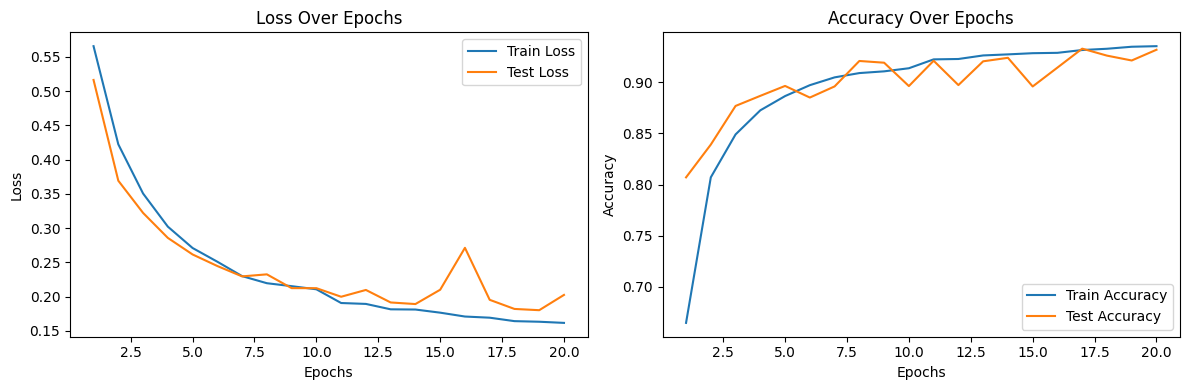

In [10]:
import matplotlib.pyplot as plt
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.tight_layout()
plt.show()


In [11]:
from sklearn.metrics import classification_report

model_one.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_one(inputs.view(inputs.size(0), -1))
        y_pred = torch.sigmoid(outputs.squeeze()) > 0.5
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(y_pred.cpu().numpy())

print(classification_report(all_labels, all_preds))


              precision    recall  f1-score   support

           0       0.96      0.90      0.92      4783
           1       0.89      0.95      0.92      4217

    accuracy                           0.92      9000
   macro avg       0.92      0.92      0.92      9000
weighted avg       0.92      0.92      0.92      9000



Les résultats du modèle de réseau de neurones sont très prometteurs, avec une précision atteignant 96% pour la classe 0 et 89% pour la classe 1, ce qui signifie que le modèle prédit correctement la classe des échantillons dans la grande majorité des cas. De plus, un rappel de 90% pour la classe 0 et de 95% pour la classe 1 indique que le modèle identifie efficacement la plupart des exemples positifs dans le jeu de données. Le F1-score élevé de 0.92 pour les deux classes reflète un bon équilibre entre précision et rappel, essentiel pour une classification précise. Ces résultats sont renforcés par une diminution de la perte à 0.2 et une convergence de l'accuracy vers 93%, soulignant la capacité du modèle à généraliser efficacement sur de nouvelles données.

##### Score F1

Le score F1 est une mesure de la performance d'un modèle de classification qui combine la précision et le rappel en une seule métrique. Il est calculé comme la moyenne de la précision et du rappel :  $ \text{F1} = 2 \times \frac{\text{Précision} \times \text{Rappel}}{\text{Précision} + \text{Rappel}}$

La précision mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives :  $ \text{Précision} = \frac{VP}{VP + FP}$

Le rappel mesure la proportion de vrais positifs détectés parmi tous les vrais positifs réels :   $ \text{Rappel} = \frac{VP}{VP + FN}$


### 5.2 - Classifier pour tous les attributs

Après avoir évalué avec succès notre modèle de classification d'images pour un attribut spécifique, notre prochaine étape consistera à élargir sa capacité de généralisation pour inclure les 40 attributs simultanément.

Nous avons modifié notre classe `CodeLatentAnnot` pour inclure tous les attributs au lieu d'un seul. Par la suite, nous avons conservé le même modèle que précédemment, à l'exception de la couche de sortie qui compte désormais 40 neurones pour prédire les 40 attributs. En dehors cette modification, notre approche reste inchangée.

In [12]:
import numpy as np
import pandas as pd
import torch.utils.data as data

class CodeLatentAnnot(data.Dataset):
    def __init__(self,lat_file,annot_file):
        self.dlatents = np.load(lat_file)
        self.labels = np.load(annot_file)
        self.length = len(self.labels)

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        dlatent = torch.tensor(self.dlatents[idx])
        lbl = torch.tensor(self.labels[idx])

        return dlatent, lbl

In [13]:
import torch
import torch.optim as optim

class NNClassification(torch.nn.Module):
    def __init__(self):
        super(NNClassification, self).__init__()
        self.network = torch.nn.Sequential(
            torch.nn.Linear(9216, 1024),
            torch.nn.ReLU(),
            torch.nn.Linear(1024, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 40),   #On regarde désormais les 40 attributs
        )

    def forward(self, xb):
        return self.network(xb)

model = NNClassification()
print(model)


NNClassification(
  (network): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=40, bias=True)
  )
)


In [14]:
data_image = CodeLatentAnnot('data/train/celebahq_dlatents_psp.npy','data/train/celebahq_anno.npy')
trainloader = data.DataLoader(data_image, batch_size=32, shuffle=True)

In [15]:
train_size = int(0.8 * len(data_image))
test_size = len(data_image) - train_size

train_dataset =data.Subset(data_image, range(train_size))
test_dataset = data.Subset(data_image, range(train_size, train_size + test_size))

trainloader = data.DataLoader(train_dataset, batch_size=256, shuffle=True)
testloader = data.DataLoader(test_dataset, batch_size=256, shuffle=False)


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import numpy as np

# Initialisation du modèle et des paramètres
model = NNClassification()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 30
model.to(device)

learning_rate = 1e-4
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.009)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Entraînement et évaluation
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, batch in enumerate(tqdm(trainloader)):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs.view(inputs.size(0), -1))
        loss = criterion(outputs, labels.float())

        running_loss += loss.item()
        loss.backward()
        optimizer.step()

        preds = outputs > 0.5
        correct += (preds == labels).sum().item()
        total += labels.numel()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(correct / total)

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, batch in enumerate(testloader):
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs.view(inputs.size(0), -1))
            loss = criterion(outputs, labels.float())

            running_loss += loss.item()

            preds = outputs > 0.5
            correct += (preds == labels).sum().item()
            total += labels.numel()

    test_losses.append(running_loss / len(testloader))
    test_accuracies.append(correct / total)
    print('Fin epochs : ', epoch + 1, "sur", num_epochs, "Accuracy de train : ", train_accuracies[-1], "  Accuracy de test : ", test_accuracies[-1])

print('Entraînement terminé')


100%|██████████| 94/94 [00:01<00:00, 51.18it/s]


Fin epochs :  1 sur 30 Accuracy de train :  0.8177885416666667   Accuracy de test :  0.8474375


100%|██████████| 94/94 [00:01<00:00, 51.12it/s]


Fin epochs :  2 sur 30 Accuracy de train :  0.8492239583333333   Accuracy de test :  0.8572166666666666


100%|██████████| 94/94 [00:01<00:00, 51.08it/s]


Fin epochs :  3 sur 30 Accuracy de train :  0.8585614583333333   Accuracy de test :  0.8539791666666666


100%|██████████| 94/94 [00:01<00:00, 51.67it/s]


Fin epochs :  4 sur 30 Accuracy de train :  0.861996875   Accuracy de test :  0.8659583333333334


100%|██████████| 94/94 [00:01<00:00, 51.24it/s]


Fin epochs :  5 sur 30 Accuracy de train :  0.8645927083333333   Accuracy de test :  0.8597291666666667


100%|██████████| 94/94 [00:01<00:00, 51.31it/s]


Fin epochs :  6 sur 30 Accuracy de train :  0.8660427083333333   Accuracy de test :  0.8705208333333333


100%|██████████| 94/94 [00:01<00:00, 51.72it/s]


Fin epochs :  7 sur 30 Accuracy de train :  0.8674520833333333   Accuracy de test :  0.8671166666666666


100%|██████████| 94/94 [00:01<00:00, 51.40it/s]


Fin epochs :  8 sur 30 Accuracy de train :  0.86849375   Accuracy de test :  0.8722875


100%|██████████| 94/94 [00:01<00:00, 48.88it/s]


Fin epochs :  9 sur 30 Accuracy de train :  0.8688708333333334   Accuracy de test :  0.866975


100%|██████████| 94/94 [00:01<00:00, 51.10it/s]


Fin epochs :  10 sur 30 Accuracy de train :  0.869353125   Accuracy de test :  0.8726666666666667


100%|██████████| 94/94 [00:01<00:00, 51.67it/s]


Fin epochs :  11 sur 30 Accuracy de train :  0.8697822916666667   Accuracy de test :  0.8638666666666667


100%|██████████| 94/94 [00:01<00:00, 51.42it/s]


Fin epochs :  12 sur 30 Accuracy de train :  0.8692229166666666   Accuracy de test :  0.8696708333333333


100%|██████████| 94/94 [00:01<00:00, 51.54it/s]


Fin epochs :  13 sur 30 Accuracy de train :  0.8699645833333334   Accuracy de test :  0.868475


100%|██████████| 94/94 [00:01<00:00, 51.56it/s]


Fin epochs :  14 sur 30 Accuracy de train :  0.8704395833333334   Accuracy de test :  0.868125


100%|██████████| 94/94 [00:01<00:00, 51.35it/s]


Fin epochs :  15 sur 30 Accuracy de train :  0.8703729166666667   Accuracy de test :  0.870925


100%|██████████| 94/94 [00:01<00:00, 50.62it/s]


Fin epochs :  16 sur 30 Accuracy de train :  0.8707458333333333   Accuracy de test :  0.8717958333333333


100%|██████████| 94/94 [00:01<00:00, 50.87it/s]


Fin epochs :  17 sur 30 Accuracy de train :  0.8708635416666667   Accuracy de test :  0.8734583333333333


100%|██████████| 94/94 [00:01<00:00, 50.72it/s]


Fin epochs :  18 sur 30 Accuracy de train :  0.8714145833333333   Accuracy de test :  0.8712291666666667


100%|██████████| 94/94 [00:01<00:00, 51.25it/s]


Fin epochs :  19 sur 30 Accuracy de train :  0.8705177083333333   Accuracy de test :  0.8741


100%|██████████| 94/94 [00:01<00:00, 51.06it/s]


Fin epochs :  20 sur 30 Accuracy de train :  0.870375   Accuracy de test :  0.8729166666666667


100%|██████████| 94/94 [00:01<00:00, 50.75it/s]


Fin epochs :  21 sur 30 Accuracy de train :  0.871403125   Accuracy de test :  0.8709958333333333


100%|██████████| 94/94 [00:01<00:00, 51.29it/s]


Fin epochs :  22 sur 30 Accuracy de train :  0.8712645833333333   Accuracy de test :  0.8677291666666667


100%|██████████| 94/94 [00:01<00:00, 51.36it/s]


Fin epochs :  23 sur 30 Accuracy de train :  0.8714989583333334   Accuracy de test :  0.8714375


100%|██████████| 94/94 [00:01<00:00, 51.06it/s]


Fin epochs :  24 sur 30 Accuracy de train :  0.8718510416666667   Accuracy de test :  0.8729625


100%|██████████| 94/94 [00:01<00:00, 50.87it/s]


Fin epochs :  25 sur 30 Accuracy de train :  0.8713614583333333   Accuracy de test :  0.873225


100%|██████████| 94/94 [00:01<00:00, 51.09it/s]


Fin epochs :  26 sur 30 Accuracy de train :  0.8719875   Accuracy de test :  0.8746541666666666


100%|██████████| 94/94 [00:01<00:00, 51.17it/s]


Fin epochs :  27 sur 30 Accuracy de train :  0.8718645833333334   Accuracy de test :  0.8721583333333334


100%|██████████| 94/94 [00:01<00:00, 50.25it/s]


Fin epochs :  28 sur 30 Accuracy de train :  0.8719489583333333   Accuracy de test :  0.873625


100%|██████████| 94/94 [00:01<00:00, 50.17it/s]


Fin epochs :  29 sur 30 Accuracy de train :  0.8714635416666666   Accuracy de test :  0.8684416666666667


100%|██████████| 94/94 [00:01<00:00, 50.53it/s]


Fin epochs :  30 sur 30 Accuracy de train :  0.8716947916666666   Accuracy de test :  0.869375
Entraînement terminé


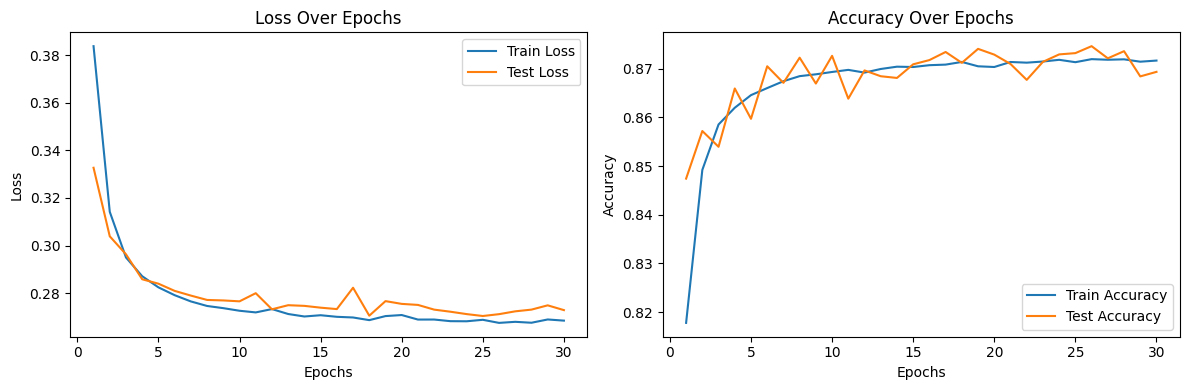

In [17]:
import matplotlib.pyplot as plt
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.tight_layout()
plt.show()


Les résultats obtenus avec sont les probabilités pour 40 attributs. Malgré des performances légèrement inférieures à celles précédemment mentionnées, les résultats sont très bons. La décroissance des losses jusqu'à 0.25 suggère que le modèle parvient à réduire l'erreur lors de l'entraînement et à généraliser raisonnablement bien sur les données de test. Une accuracy stabilisée à 0.87 indique que le modèle est précis dans ses prédictions pour environ 89% des échantillons. Bien que légèrement inférieure à la précédente, cette précision reste significative pour de nombreuses applications. Cette performance est probablement due à la complexité accrue de la tâche avec 40 attributs à prédire simultanément, ce qui nécessite une capacité de généralisation plus robuste. En résumé, bien que les résultats soient légèrement en deçà des précédents, ce modèle montre une capacité prometteuse à traiter efficacement un grand nombre d'attributs tout en maintenant une précision respectable.

In [18]:
#Sauvegarde du modèle
torch.save(model.state_dict(),'pretrained_models/latent_classifier_new.pth'.format(epoch))

## 6 - Le transformer

**Transformateur Latent**

Étant donné un code latent $ w \in W^+ $, le transformateur latent $T$ génère la direction pour une modification d'attribut unique, où l'ampleur des changements est contrôlée par un facteur d'échelle $\alpha $. Le réseau est exprimé avec une seule couche de transformation linéaire $ f $ :

$ \mathbf{T}(w, \alpha ) = \mathbf{w} + \alpha \cdot f(\mathbf{w}) $

Pendant l'entraînement, le facteur d'échelle $ \alpha $ est défini en fonction de la probabilité $ p $ de l'attribut cible du code latent d'entrée :  
(1 − $ p $) pour $p < 0,5 $ \
 −$ p $ pour $ p > 0,5 $. \
Au moment du test, $ \alpha $ peut être échantillonné dans l'intervalle [−1, 1] ou défini au-delà de cette plage en fonction de l'ampleur des modifications souhaitées.

In [4]:
import torch.nn.functional as F

class Transform(torch.nn.Module):
    def __init__(self, input_size, output_size,attribute):
        super(Transform, self).__init__()
        self.weight = torch.nn.Parameter(torch.Tensor(output_size, input_size))
        self.bias = torch.nn.Parameter(torch.Tensor(output_size))
        self.k=attribute
        torch.nn.init.xavier_uniform_(self.weight)
        torch.nn.init.zeros_(self.bias)

    def forward(self, x,alpha):
        weight=self.weight
        fx = F.linear(x, weight, bias=self.bias)  
        return x+alpha*fx


Pour garantir que $ T_k $ manipule efficacement l'attribut $ a_k $, nous minimisons la perte de classification binaire :

$  \mathcal{L}_{\rm cls} = - y_k \log (\mathbf{p}_k) - (1 - y_k) \log (1 - \mathbf{p}_k) $

où $ p_k = C(T_k (w))[k] $ est la probabilité de l'attribut cible et $ y_k \in \{0, 1\} $ est le label désiré.

Pour garantir que les autres attributs $ a_i $, $i \neq k $ restent les mêmes, nous appliquons un terme de régularisation des attributs :

$ \mathcal{L}_{\rm attr} = \sum_{i\neq k}(1-\gamma_{ik}) \mathbb{E}_{\mathbf{w}, i}[||\mathbf{p}_i - \mathbf{C}(\mathbf{w})[i]||_2] $

où $ \gamma_{ik} $ est la valeur de corrélation absolue entre $ a_i $ et l'attribut cible $ a_k $, mesurée sur le jeu de données d'entraînement. Ce terme de régularisation est pondéré en fonction de la corrélation pour éviter que les attributs naturellement corrélés avec la cible ne soient trop contraints, par exemple, « joufflu » et « double menton ».

Pour garantir que l'identité de la personne est préservée, nous appliquons également une régularisation du code latent :

$ \mathcal{L}_{\rm rec} = \mathbb{E}_{\mathbf{w}}[||\mathbf{T(w)} - \mathbf{w}||_2] $

La perte objective complète peut être décrite comme suit :

$ \mathcal{L} = \mathcal{L}_{\rm cls} + \lambda_{\rm attr} \mathcal{L}_{\rm attr} + \lambda_{\rm rec} \mathcal{L}_{\rm rec} $

où $ \lambda_{\rm attr} $ et $\lambda_{\rm rec} $ sont des poids équilibrant chaque perte.


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def calcul_loss(k,gamma_ik,initial_attributes,alphas, initial_latent_codes, transformed_latent_codes,transformed_attributes):

    # Paramètres pour la perte
    lambda_attr = 1
    lambda_rec = 10
    
    attr_k=initial_attributes[:,k]
    pk=transformed_attributes[:, k]
    
    # L_cls
    target_pb = torch.clamp(attr_k + alphas, 0, 1).round()
    cls_loss = nn.BCEWithLogitsLoss()(pk, target_pb) 
    cls_loss = cls_loss.mean()
    # L_attr
    mask=gamma_ik.repeat(transformed_attributes.size(0),1)    
    attr_loss = nn.MSELoss()(transformed_attributes*mask,initial_attributes*mask)
    # L_rec
    rec_loss = nn.MSELoss()(transformed_latent_codes,initial_latent_codes)  
    # Total loss
    total_loss = cls_loss + lambda_attr * attr_loss + lambda_rec * rec_loss
    return total_loss

In [21]:
data_image = CodeLatentAnnot('data/train/celebahq_dlatents_psp.npy','data/train/celebahq_anno.npy')
train_size = int(0.8 * len(data_image))
test_size = len(data_image) - train_size

train_dataset =data.Subset(data_image, range(train_size))
test_dataset = data.Subset(data_image, range(train_size, train_size + test_size))

trainloader = data.DataLoader(train_dataset, batch_size=256, shuffle=True)
testloader = data.DataLoader(test_dataset, batch_size=256, shuffle=False)


In [22]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 50

att=31
transfo= Transform(9216,9216,att)
transfo.to(device) 



lbls = np.load("celebahq_anno.npy")
corr_ma = np.corrcoef(lbls.transpose())
corr_ma[np.isnan(corr_ma)] = 0
gamma_ik = np.abs(corr_ma[transfo.k:transfo.k+1])
gamma_ik = torch.tensor((1-gamma_ik), dtype=torch.float32).squeeze().to(device)



optimizer = optim.Adam(transfo.parameters(), lr=1e-4,betas=(0.9,0.999))

classifier = NNClassification()
# Chemin vers le fichier .pth
model_path = "pretrained_models/latent_classifier_new.pth"
classifier.load_state_dict(torch.load(model_path))
classifier.to(device)
classifier.eval()



train_losses = []
test_losses = []

for epoch in range(num_epochs):
    transfo.train()
    running_loss = 0.0
    for i, batch in enumerate(tqdm(trainloader)):

        latent_codes, labels = batch
        latent_codes, labels = latent_codes.to(device), labels.to(device)

        initial_attributes=classifier(latent_codes.view(latent_codes.size(0), -1))

        alphas_pre=initial_attributes[:,att]
        alphas_pre=torch.where(alphas_pre < 0.5, 1 - alphas_pre, -alphas_pre)
        alphas=alphas_pre.view(alphas_pre.size(0),-1)


        optimizer.zero_grad()
        
        transformed_latent_codes = transfo(latent_codes.view(latent_codes.size(0), -1),alphas)
        transformed_attributes=classifier(transformed_latent_codes)
        loss = calcul_loss(transfo.k,gamma_ik,initial_attributes,alphas_pre,latent_codes.view(latent_codes.size(0), -1), transformed_latent_codes,transformed_attributes)

        loss.backward()
        optimizer.step()


        running_loss += loss.item()

    train_losses.append(running_loss / len(trainloader))

    running_loss = 0.0
    transfo.eval()
    with torch.no_grad():
        for i, batch in enumerate(testloader):
            
            latent_codes, labels = batch
            latent_codes, labels = latent_codes.to(device), labels.to(device)

            initial_attributes=classifier(latent_codes.view(latent_codes.size(0), -1))

            alphas_pre=initial_attributes[:,att]
            alphas_pre=torch.where(alphas_pre < 0.5, 1 - alphas_pre, -alphas_pre)
            alphas=alphas_pre.view(alphas_pre.size(0),-1)
            
            transformed_latent_codes = transfo(latent_codes.view(latent_codes.size(0), -1),alphas)
            transformed_attributes=classifier(transformed_latent_codes)
            loss = calcul_loss(transfo.k,gamma_ik,initial_attributes,alphas_pre,latent_codes.view(latent_codes.size(0), -1), transformed_latent_codes,transformed_attributes)


            running_loss += loss.item()


    test_losses.append(running_loss / len(testloader))

    print(f"Epoch {epoch+1}/{num_epochs}\ttrain loss : {train_losses[-1]}\ttest loss : {test_losses[-1]}")

print('Entraînement terminé')


100%|██████████| 94/94 [00:11<00:00,  8.39it/s]


Epoch 1/50	train loss : 126.06796321463078	test loss : 49.50610907872518


100%|██████████| 94/94 [00:11<00:00,  8.41it/s]


Epoch 2/50	train loss : 42.7251133614398	test loss : 31.286208788553875


100%|██████████| 94/94 [00:10<00:00,  9.12it/s]


Epoch 3/50	train loss : 30.10136198490224	test loss : 27.745742321014404


100%|██████████| 94/94 [00:09<00:00, 10.05it/s]


Epoch 4/50	train loss : 23.347360205143055	test loss : 18.022327025731403


100%|██████████| 94/94 [00:09<00:00,  9.97it/s]


Epoch 5/50	train loss : 18.500407787079507	test loss : 18.546488126118977


100%|██████████| 94/94 [00:09<00:00, 10.03it/s]


Epoch 6/50	train loss : 16.59565509633815	test loss : 15.189773678779602


100%|██████████| 94/94 [00:09<00:00, 10.05it/s]


Epoch 7/50	train loss : 15.5139413894491	test loss : 12.815857410430908


100%|██████████| 94/94 [00:09<00:00, 10.05it/s]


Epoch 8/50	train loss : 13.150681850758005	test loss : 11.434798955917358


100%|██████████| 94/94 [00:09<00:00, 10.04it/s]


Epoch 9/50	train loss : 18.52613479533094	test loss : 12.695379734039307


100%|██████████| 94/94 [00:09<00:00, 10.05it/s]


Epoch 10/50	train loss : 11.328608066477674	test loss : 11.380990505218506


100%|██████████| 94/94 [00:09<00:00, 10.06it/s]


Epoch 11/50	train loss : 10.942464787909325	test loss : 9.035277605056763


100%|██████████| 94/94 [00:09<00:00, 10.00it/s]


Epoch 12/50	train loss : 10.170320013736157	test loss : 11.042499661445618


100%|██████████| 94/94 [00:09<00:00, 10.01it/s]


Epoch 13/50	train loss : 10.097222160785757	test loss : 11.473469813664755


100%|██████████| 94/94 [00:09<00:00, 10.04it/s]


Epoch 14/50	train loss : 9.646521608880226	test loss : 10.467957973480225


100%|██████████| 94/94 [00:09<00:00, 10.06it/s]


Epoch 15/50	train loss : 9.214386422583397	test loss : 9.96023122469584


100%|██████████| 94/94 [00:09<00:00, 10.02it/s]


Epoch 16/50	train loss : 9.329816858819191	test loss : 7.118784288565318


100%|██████████| 94/94 [00:09<00:00, 10.02it/s]


Epoch 17/50	train loss : 8.938570682038652	test loss : 10.744192997614542


100%|██████████| 94/94 [00:09<00:00, 10.04it/s]


Epoch 18/50	train loss : 10.582957810543952	test loss : 10.420839468638102


100%|██████████| 94/94 [00:09<00:00,  9.95it/s]


Epoch 19/50	train loss : 8.38050889968872	test loss : 6.726049800713857


100%|██████████| 94/94 [00:09<00:00, 10.02it/s]


Epoch 20/50	train loss : 8.119404057238965	test loss : 8.648155510425568


100%|██████████| 94/94 [00:09<00:00, 10.01it/s]


Epoch 21/50	train loss : 9.374232931339995	test loss : 10.24975029627482


100%|██████████| 94/94 [00:09<00:00, 10.04it/s]


Epoch 22/50	train loss : 8.619620997855003	test loss : 9.770255406697592


100%|██████████| 94/94 [00:09<00:00, 10.00it/s]


Epoch 23/50	train loss : 7.815814408850162	test loss : 10.560371319452921


100%|██████████| 94/94 [00:09<00:00, 10.03it/s]


Epoch 24/50	train loss : 7.726965960035932	test loss : 7.755128979682922


100%|██████████| 94/94 [00:09<00:00, 10.04it/s]


Epoch 25/50	train loss : 7.742420977734505	test loss : 7.39139582713445


100%|██████████| 94/94 [00:09<00:00, 10.00it/s]


Epoch 26/50	train loss : 7.453125578291873	test loss : 9.95080554485321


100%|██████████| 94/94 [00:09<00:00, 10.02it/s]


Epoch 27/50	train loss : 7.519872939333003	test loss : 7.2771340409914655


100%|██████████| 94/94 [00:09<00:00, 10.03it/s]


Epoch 28/50	train loss : 7.299786841615718	test loss : 10.801273703575134


100%|██████████| 94/94 [00:09<00:00, 10.01it/s]


Epoch 29/50	train loss : 8.550107007331036	test loss : 6.2463346521059675


100%|██████████| 94/94 [00:09<00:00, 10.03it/s]


Epoch 30/50	train loss : 6.95581732404993	test loss : 5.777168810367584


100%|██████████| 94/94 [00:09<00:00, 10.04it/s]


Epoch 31/50	train loss : 7.763631856187861	test loss : 8.20763099193573


100%|██████████| 94/94 [00:09<00:00,  9.96it/s]


Epoch 32/50	train loss : 7.126627095202182	test loss : 8.429539541403452


100%|██████████| 94/94 [00:09<00:00, 10.01it/s]


Epoch 33/50	train loss : 7.619193006069102	test loss : 7.649410963058472


100%|██████████| 94/94 [00:09<00:00, 10.02it/s]


Epoch 34/50	train loss : 7.431987371850521	test loss : 7.138741910457611


100%|██████████| 94/94 [00:09<00:00, 10.05it/s]


Epoch 35/50	train loss : 6.817494214849269	test loss : 6.032293816407521


100%|██████████| 94/94 [00:09<00:00, 10.01it/s]


Epoch 36/50	train loss : 7.289196673859942	test loss : 8.600142816702524


100%|██████████| 94/94 [00:09<00:00, 10.01it/s]


Epoch 37/50	train loss : 6.754664116717399	test loss : 6.319091280301412


100%|██████████| 94/94 [00:09<00:00, 10.01it/s]


Epoch 38/50	train loss : 7.139482500705313	test loss : 6.630955398082733


100%|██████████| 94/94 [00:09<00:00, 10.02it/s]


Epoch 39/50	train loss : 6.260850221552747	test loss : 7.298582156499227


100%|██████████| 94/94 [00:09<00:00, 10.04it/s]


Epoch 40/50	train loss : 7.144216334566157	test loss : 6.16361528635025


100%|██████████| 94/94 [00:09<00:00, 10.03it/s]


Epoch 41/50	train loss : 6.559904443456771	test loss : 4.367352843284607


100%|██████████| 94/94 [00:09<00:00, 10.01it/s]


Epoch 42/50	train loss : 7.203392505645752	test loss : 4.478971441586812


100%|██████████| 94/94 [00:09<00:00, 10.04it/s]


Epoch 43/50	train loss : 7.510496202935564	test loss : 9.105276068051657


100%|██████████| 94/94 [00:09<00:00, 10.06it/s]


Epoch 44/50	train loss : 6.464275299234593	test loss : 6.591206669807434


100%|██████████| 94/94 [00:09<00:00, 10.03it/s]


Epoch 45/50	train loss : 6.454650123068627	test loss : 6.408347129821777


100%|██████████| 94/94 [00:09<00:00,  9.92it/s]


Epoch 46/50	train loss : 6.7717027004728925	test loss : 6.1793849269549055


100%|██████████| 94/94 [00:09<00:00, 10.02it/s]


Epoch 47/50	train loss : 6.841030169040598	test loss : 10.272601008415222


100%|██████████| 94/94 [00:09<00:00, 10.05it/s]


Epoch 48/50	train loss : 7.092762617354698	test loss : 4.45359989007314


100%|██████████| 94/94 [00:09<00:00, 10.01it/s]


Epoch 49/50	train loss : 5.921930518556149	test loss : 4.198085228602092


100%|██████████| 94/94 [00:09<00:00, 10.02it/s]


Epoch 50/50	train loss : 6.856417818272368	test loss : 5.939098795255025
Entraînement terminé


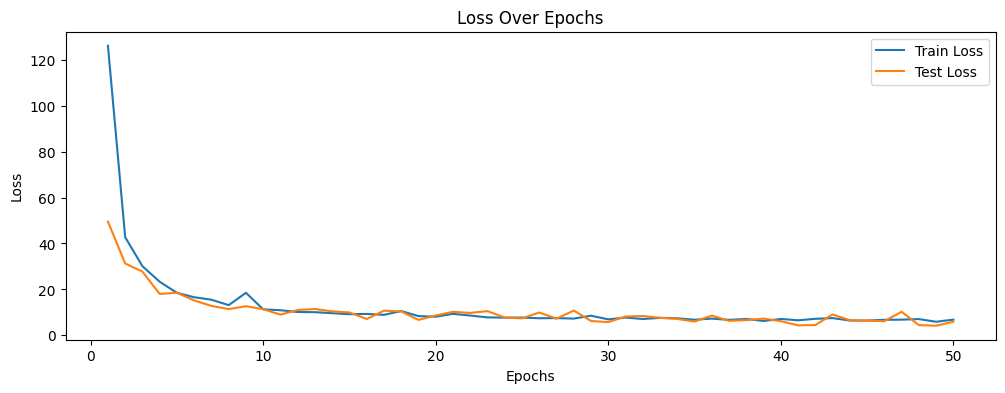

In [23]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 4))

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

In [28]:
torch.save(transfo.state_dict(),f'pretrained_models/transfo_{att}_v50e.pth')

On observe une décroissance des pertes (loss) de test et d'entraînement vers 0. Cela indique que notre modèle fonctionne bien, car il parvient à minimiser l'erreur aussi bien sur les données d'entraînement que sur les données de test.

## 7 - Modification d'attributs

Le dictionnaire attr_dict est utilisé pour associer des indices numériques à différents attributs faciaux dans notre modèle. Chaque attribut correspond à une caractéristique spécifique de l'apparence d'une personne dans une image.

In [24]:
attr_dict = {'5_o_Clock_Shadow': 0, 'Arched_Eyebrows': 1, 'Attractive': 2, 'Bags_Under_Eyes': 3,
            'Bald': 4, 'Bangs': 5, 'Big_Lips': 6, 'Big_Nose': 7, 'Black_Hair': 8, 'Blond_Hair': 9, 
            'Blurry': 10, 'Brown_Hair': 11, 'Bushy_Eyebrows': 12, 'Chubby': 13, 'Double_Chin': 14, 
            'Eyeglasses': 15, 'Goatee': 16, 'Gray_Hair': 17, 'Heavy_Makeup': 18, 'High_Cheekbones': 19,
            'Male': 20, 'Mouth_Slightly_Open': 21, 'Mustache': 22, 'Narrow_Eyes': 23, 'No_Beard': 24,
            'Oval_Face': 25, 'Pale_Skin': 26, 'Pointy_Nose': 27, 'Receding_Hairline': 28, 'Rosy_Cheeks': 29,
            'Sideburns': 30, 'Smiling': 31, 'Straight_Hair': 32, 'Wavy_Hair': 33, 'Wearing_Earrings': 34,
            'Wearing_Hat': 35, 'Wearing_Lipstick': 36, 'Wearing_Necklace': 37, 'Wearing_Necktie': 38, 'Young': 39}

Dans cette section, nous reprenons les parties de code précédemment décrites, en utilisant notre classificateur et notre transformateur latent pour modifier l'attribut d'une image cible.

In [6]:
network_pkl= "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan2/versions/1/files/stylegan2-ffhq-1024x1024.pkl"
seeds=[1]
truncation_psi= 1.0
noise_mode='const'
outdir= "transfo"
translate=[0,0]
rotate= 0
class_idx= None

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan2/versions/1/files/stylegan2-ffhq-1024x1024.pkl"...


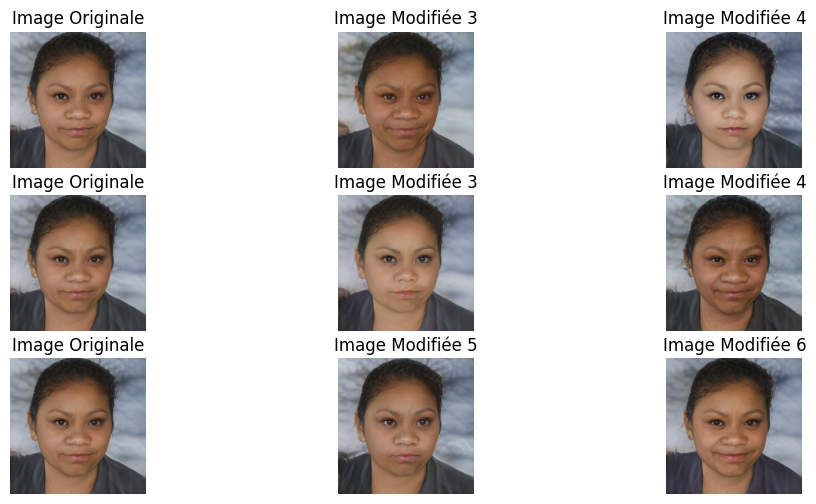

In [8]:
import torch
import dnnlib
from torch import nn
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
import click

# Chargement du réseau génératif
print('Loading networks from "%s"...' % network_pkl)
device = torch.device('cuda')  # Utilisation du GPU
with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)  # Chargement du modèle G_ema du fichier network_pkl

# Création du répertoire de sortie s'il n'existe pas
os.makedirs(outdir, exist_ok=True)

# Labels (classes)
label = torch.zeros([1, G.c_dim], device=device)  # Initialisation des labels de classe à zéro
if G.c_dim != 0:
    if class_idx is None:
        raise click.ClickException('Must specify class label with --class when using a conditional network')
    label[:, class_idx] = 1  # Définition du label de classe si le réseau est conditionnel
else:
    if class_idx is not None:
        print ('warn: --class=lbl ignored when running on an unconditional network')  # Avertissement si le réseau n'est pas conditionnel mais qu'un label de classe est spécifié

# Transformation d'entrée (si applicable)
if hasattr(G.synthesis, 'input'):
    m = make_transform(translate, rotate)  # Création d'une transformation d'entrée (par exemple, translation, rotation)
    m = np.linalg.inv(m)
    G.synthesis.input.transform.copy_(torch.from_numpy(m))  # Application de la transformation au modèle G

# Chargement du code latent à partir d'un fichier numpy
w = torch.from_numpy(np.load('data/test/latent_code_00002.npy')).to(device)

# Génération de l'image initiale à partir du code latent w
img = G.synthesis(w, noise_mode=noise_mode)
img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)  # Conversion de l'image en RGB et ajustement des valeurs
img_pil = PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')  # Conversion de l'image en format PIL

# Sauvegarde du code latent original et de sa forme d'origine
w0 = w
original_shape = w.shape

# Première modification d'attribut avec un transformateur spécifique (transfo_26)
transfo = Transform(9216, 9216, 26)
model_path = f"pretrained_models/transfo_26_v50e.pth"
transfo.load_state_dict(torch.load(model_path))  # Chargement des poids du modèle transformateur
transfo.to(device)
transfo.eval()

alpha = -2  # Paramètre alpha pour la modification d'attribut
w = transfo(w.view(w.size(0), -1), alpha)  # Application de la transformation avec alpha
w = w.view(original_shape)  # Rétablissement de la forme originale du code latent
img_mod = G.synthesis(w, noise_mode=noise_mode)  # Génération de l'image modifiée
img_mod = (img_mod.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)  # Conversion de l'image en RGB et ajustement des valeurs
img_mod_pil1 = PIL.Image.fromarray(img_mod[0].cpu().numpy(), 'RGB')  # Conversion de l'image en format PIL

# Deuxième modification d'attribut avec le même transformateur (transfo_26) mais avec un autre alpha
alpha = 3
w = transfo(w0.view(w0.size(0), -1), alpha)
w = w.view(original_shape)
img_mod = G.synthesis(w, noise_mode=noise_mode)
img_mod = (img_mod.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img_mod_pil2 = PIL.Image.fromarray(img_mod[0].cpu().numpy(), 'RGB')

# Modification d'attribut avec un autre transformateur (transfo_7)
transfo = Transform(9216, 9216, 7)
model_path = f"pretrained_models/transfo_7_v50e.pth"
transfo.load_state_dict(torch.load(model_path))  # Chargement des poids du modèle transformateur
transfo.to(device)
transfo.eval()

alpha = -1
w = transfo(w0.view(w0.size(0), -1), alpha)
w = w.view(original_shape)
img_mod = G.synthesis(w, noise_mode=noise_mode)
img_mod = (img_mod.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img_mod_pil3 = PIL.Image.fromarray(img_mod[0].cpu().numpy(), 'RGB')

alpha = 1
w = transfo(w0.view(w0.size(0), -1), alpha)
w = w.view(original_shape)
img_mod = G.synthesis(w, noise_mode=noise_mode)
img_mod = (img_mod.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img_mod_pil4 = PIL.Image.fromarray(img_mod[0].cpu().numpy(), 'RGB')

# Modification d'attribut avec un autre transformateur (transfo_31)
transfo = Transform(9216, 9216, 31)
model_path = f"pretrained_models/transfo_31_v50e.pth"
transfo.load_state_dict(torch.load(model_path))  # Chargement des poids du modèle transformateur
transfo.to(device)
transfo.eval()

alpha = -1
w = transfo(w0.view(w0.size(0), -1), alpha)
w = w.view(original_shape)
img_mod = G.synthesis(w, noise_mode=noise_mode)
img_mod = (img_mod.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img_mod_pil5 = PIL.Image.fromarray(img_mod[0].cpu().numpy(), 'RGB')

alpha = 1
w = transfo(w0.view(w0.size(0), -1), alpha)
w = w.view(original_shape)
img_mod = G.synthesis(w, noise_mode=noise_mode)
img_mod = (img_mod.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
img_mod_pil6 = PIL.Image.fromarray(img_mod[0].cpu().numpy(), 'RGB')

# Affichage des images côte à côte
fig, axes = plt.subplots(3, 3, figsize=(12, 6))

# Image originale
axes[0, 0].imshow(img_pil)
axes[0, 0].axis('off')
axes[0, 0].set_title('Image Originale')

axes[1, 0].imshow(img_pil)
axes[1, 0].axis('off')
axes[1, 0].set_title('Image Originale')

axes[2, 0].imshow(img_pil)
axes[2, 0].axis('off')
axes[2, 0].set_title('Image Originale')

# Images modifiées
axes[0, 1].imshow(img_mod_pil1)
axes[0, 1].axis('off')
axes[0, 1].set_title('Image Modifiée 3')

axes[0, 2].imshow(img_mod_pil2)
axes[0, 2].axis('off')
axes[0, 2].set_title('Image Modifiée 4')

axes[1, 1].imshow(img_mod_pil3)
axes[1, 1].axis('off')
axes[1, 1].set_title('Image Modifiée 3')

axes[1, 2].imshow(img_mod_pil4)
axes[1, 2].axis('off')
axes[1, 2].set_title('Image Modifiée 4')

axes[2, 1].imshow(img_mod_pil5)
axes[2, 1].axis('off')
axes[2, 1].set_title('Image Modifiée 5')

axes[2, 2].imshow(img_mod_pil6)
axes[2, 2].axis('off')
axes[2, 2].set_title('Image Modifiée 6')



plt.show()


## 8 - Conclusion

En conclusion, ce projet sur l'édition d'attributs avec StyleGAN a été une expérience enrichissante à plusieurs égards. Tout d'abord, il nous a permis d'explorer un sujet très intéressant et complexe, celui de StyleGAN. En manipulant ces méthodes avancées, nous avons considérablement renforcé notre compréhension dans le domaine de la manipulation des attributs et donc des images.

Nous sommes particulièrement satisfaits d'avoir pu concevoir et mettre en œuvre un classifier et un transformer par nos propres moyens. Les résultats prometteurs, caractérisés par une décroissance significative des pertes et une bonne précision, attestent que nos modèles semblent fonctionner correctement.

Cependant, ce parcours n'a pas été sans défis. Nous avons dû naviguer à travers des problèmes de compatibilité des versions de StyleGAN, ajuster nos approches aux particularités des codes latents utilisés, et gérer des contraintes de temps qui nous ont parfois limités dans notre exploration complète du sujet. Les différents liens GitHub qui nous ont été utiles se trouveront dans la section suivante.

En conclusion, ce projet nous a non seulement permis d'acquérir de nouvelles compétences, mais il nous a donné l'opportunité d'explorer les concepts complexes de StyleGAN. Nous avons particulièrement apprécié cette immersion dans un domaine que nous connaissions très peu. Les connaissances et compétences acquises lors de ce projet nous seront précieuses à l'avenir, et nous pourrons très certainement les réutiliser dans de futurs travaux.

### Annexes : Lien utiles

#### Github :
https://github.com/NVlabs/stylegan3 \
https://github.com/InterDigitalInc/latent-transformer \
https://github.com/eladrich/pixel2style2pixel \
https://github.com/csxmli2016/w-plus-adapter 

#### Articles :
- Yao, X., Newson, A., Gousseau, Y., & Hellier, P.. A Latent Transformer for Disentangled Face Editing in Images and Videos. LTCI, Télécom Paris, Institut Polytechnique de Paris, France & InterDigital R&I, 975 avenue des Champs Blancs, Cesson-Sévigné, France
- Abdal, R., Qin, Y., & Wonka, P.. Image2StyleGAN: How to Embed Images Into the StyleGAN Latent Space? KAUST.
- Shen, Y., Gu, J., Tang, X., & Zhou, B.. Interpreting the Latent Space of GANs for Semantic Face Editing. The Chinese University of Hong Kong & The Chinese University of Hong Kong, Shenzhen.